### **Project Overview**
This project is about Titanic accident occured in 1912. It had over 2000 passenger onboard with over 1500 fatalities. This dataset helps us to analyse the survival trend based age, socioeconomic factors, etc.

**This project aims to achieve:**
1. Comprehensive Exploratory Data Analysis (EDA).
2. Identify key trends and patterns in survival rates.
3. Derive actionable insights to enhance decision-making.

### **Project Overview**
This project is about Titanic accident occured in 1912. It had over 2000 passenger onboard with over 1500 fatalities. This dataset helps us to analyse the survival trend based age, socioeconomic factors, etc.

**This project aims to achieve:**
1. Comprehensive Exploratory Data Analysis (EDA).
2. Identify key trends and patterns in survival rates.
3. Derive actionable insights to enhance decision-making.

## 1. Load the dataset

In [68]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#load the dataset
data = pd.read_csv('/Users/user/Desktop/Data Science/python_files/files_for_data_wrangling/train.csv')

In [69]:
#preview of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
#columns in the dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [71]:
#different data types of the columns
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [72]:
#null values in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [73]:
#shape of the dataset
data.shape

(891, 12)

In [74]:
#summary statistics of the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Dealing with missing values.

In [76]:
print("Percentage of missing values in each column\n",data.isnull().sum()/len(data))

Percentage of missing values in each column
 PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [77]:
#impute missing values with ml libraries
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor

#create a copy of the dataset so that original set remains unchanged
data_imp = data.copy()

#separate the numerical and categorical columns
num_cols = data_imp.select_dtypes(include=['number']).columns
cat_cols = data_imp.select_dtypes(exclude=['number']).columns

#use iterative imputer for numerical features
num_imp = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
data_imp[num_cols] = num_imp.fit_transform(data_imp[num_cols])

#fill the categorical column's missing values with the mode of that column
for col in cat_cols:
    data_imp[col] = data_imp[col].fillna(data_imp[col].mode()[0])


In [78]:
#check weather we successfully filled the missing values
data_imp.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 3. Univariate Analysis

Survival Count Survived
0.0    549
1.0    342
Name: count, dtype: int64


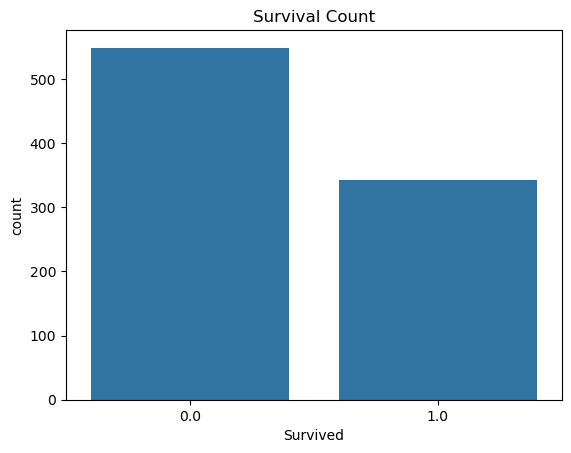

In [80]:
#number of people died and survived
print("Survival Count", data_imp['Survived'].value_counts())

sns.countplot(x='Survived', data=data_imp)

plt.title('Survival Count')

plt.show()

Pclass Distribution:
 Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


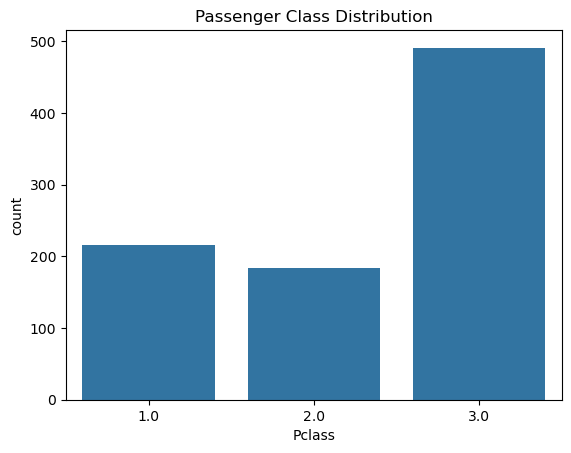

In [81]:
#analyze pclass

print("Pclass Distribution:\n", data_imp['Pclass'].value_counts())

sns.countplot(x='Pclass', data=data_imp)

plt.title('Passenger Class Distribution')

plt.show()

Sex Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64


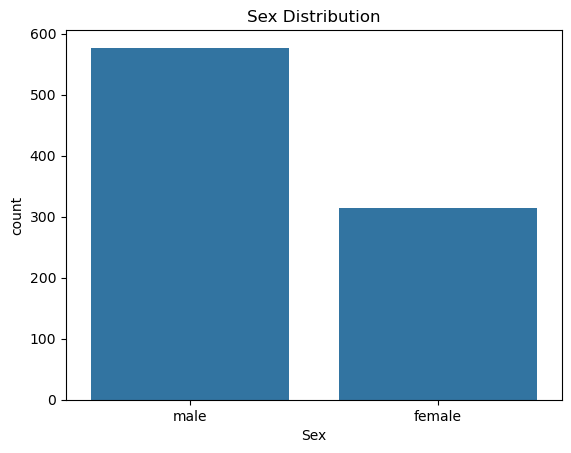

In [82]:
#analyze sex

print("Sex Distribution:\n", data_imp['Sex'].value_counts())

sns.countplot(x='Sex', data= data_imp)

plt.title('Sex Distribution')

plt.show()

Age Statistics:
 count    891.000000
mean      29.611634
std       13.728388
min        0.420000
25%       21.180000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


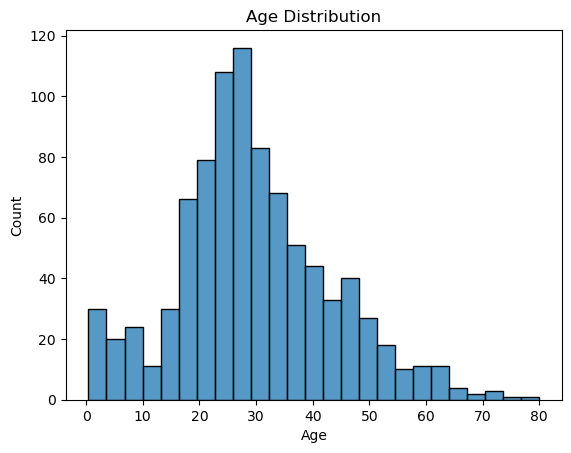

In [83]:
#analyze age

print("Age Statistics:\n", data_imp['Age'].describe())

sns.histplot(x='Age', data= data_imp)

plt.title('Age Distribution')

plt.show()

Survival by Gender:
 Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


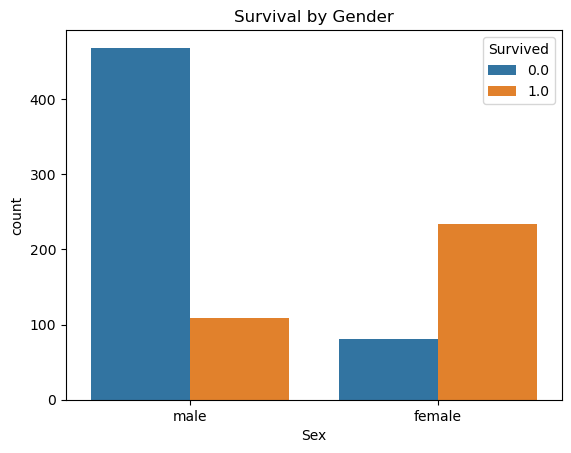

In [84]:
#analyze survival based on gender

print("Survival by Gender:\n", data_imp.groupby('Sex')['Survived'].value_counts())

sns.countplot(x='Sex', hue='Survived', data= data_imp)

plt.title('Survival by Gender')

plt.show()

Survival by Passenger Class:
 Pclass  Survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


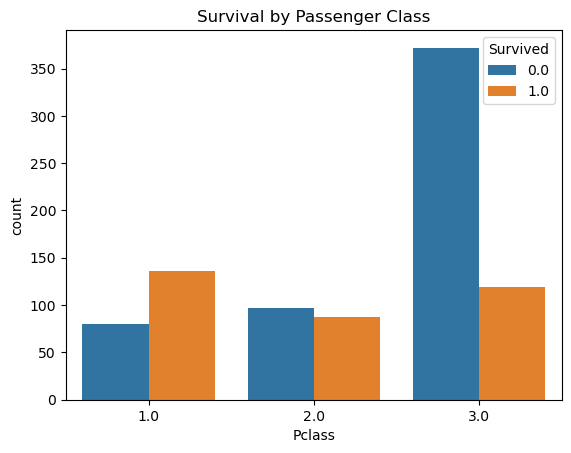

In [85]:
#analyze survival based on passenger class

print("Survival by Passenger Class:\n", data_imp.groupby('Pclass')['Survived'].value_counts())

sns.countplot(x='Pclass', hue='Survived', data=data_imp)

plt.title('Survival by Passenger Class')

plt.show()

Survival by Age Group:
 Age_group  Survived
Child      0.0          80
           1.0          74
Adult      0.0         462
           1.0         267
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


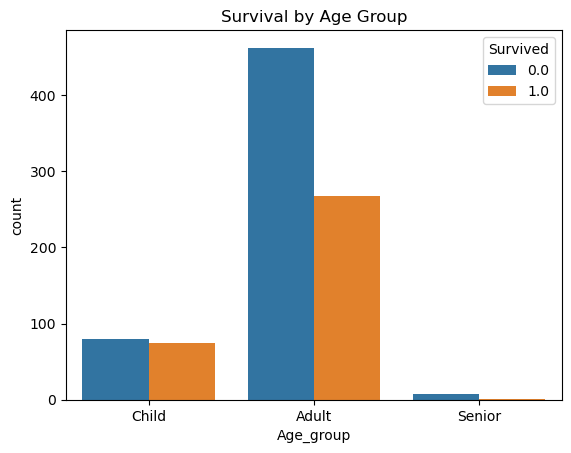

In [86]:
#analyze survival based on age groups

data_imp['Age_group'] = pd.cut(data_imp['Age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

print("Survival by Age Group:\n", data_imp.groupby('Age_group')['Survived'].value_counts())

sns.countplot(x='Age_group', hue='Survived', data=data_imp)

plt.title('Survival by Age Group')

plt.show()

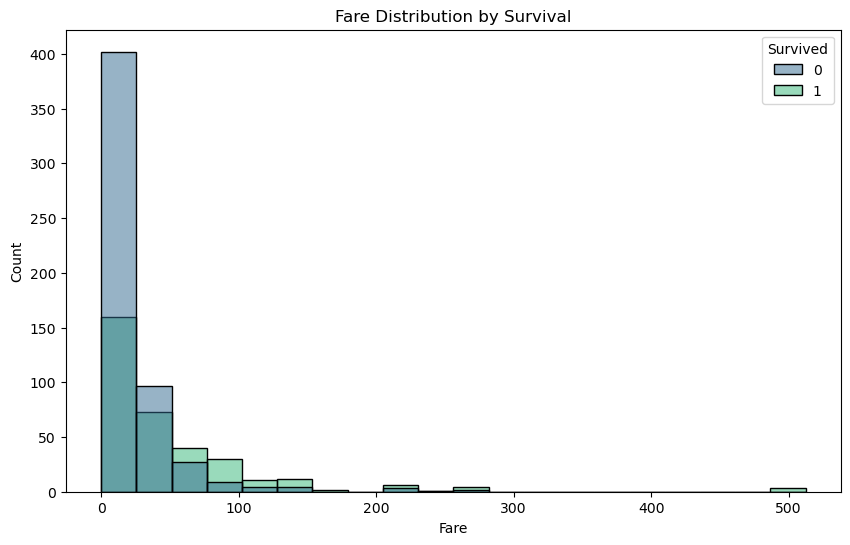

In [87]:
#survival based on fare

plt.figure(figsize=(10, 6))

sns.histplot(data, x='Fare', hue='Survived', bins=20, palette='viridis')

plt.title('Fare Distribution by Survival')

plt.xlabel('Fare')

plt.ylabel('Count')

plt.show()

## 4. Bivariate Analysis

Survival by Sex and Class:
 Sex     Pclass  Survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


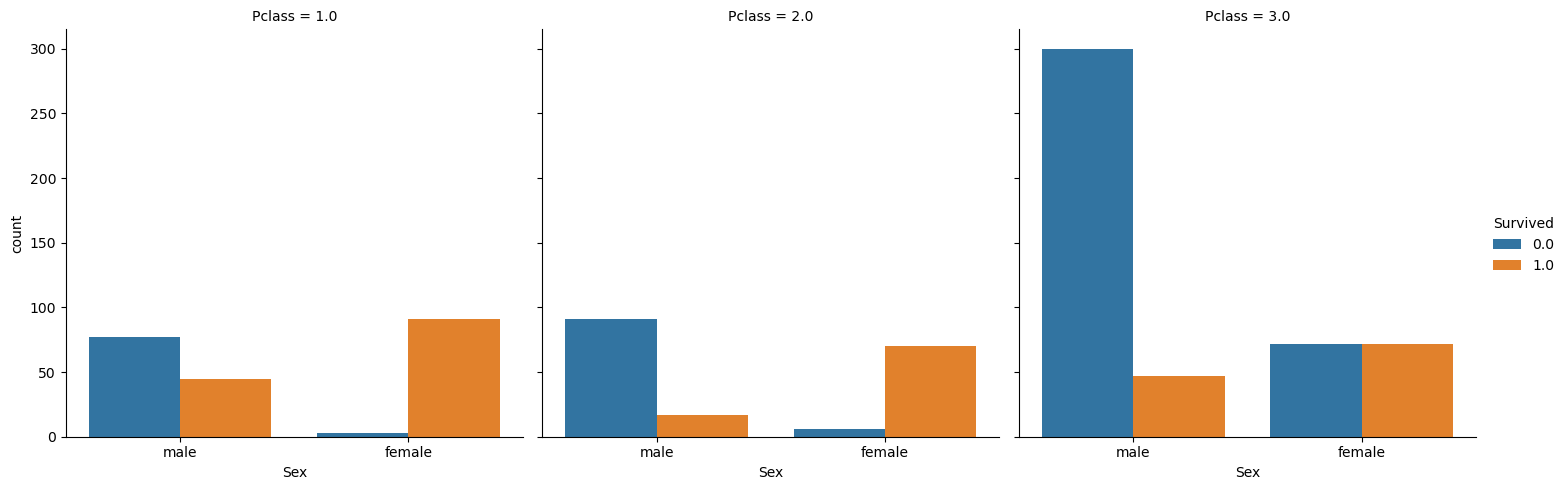

In [89]:
#analyze survival based on Sex and Pclass
print("Survival by Sex and Class:\n", data_imp.groupby(['Sex', 'Pclass'])['Survived'].value_counts())

sns.catplot(x='Sex', hue='Survived', col='Pclass', kind='count', data=data_imp)

plt.show()

Survival by Age_group and PClass:
 Age_group  Pclass  Survived
Child      1.0     1.0          14
                   0.0           2
           2.0     1.0          23
                   0.0           6
           3.0     0.0          72
                   1.0          37
Adult      1.0     1.0         121
                   0.0          75
           2.0     0.0          89
                   1.0          64
           3.0     0.0         298
                   1.0          82
Senior     1.0     0.0           3
                   1.0           1
           2.0     0.0           2
                   1.0           0
           3.0     0.0           2
                   1.0           0
Name: count, dtype: int64


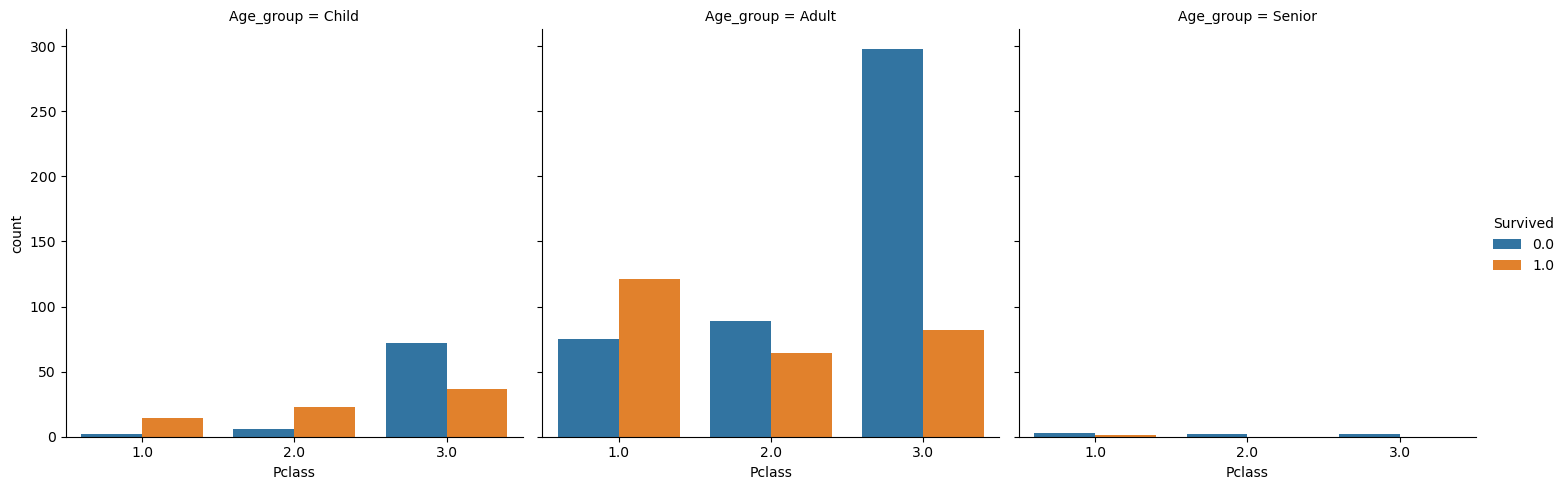

In [90]:
#analyze survival based on Age_group and Pclkass
print("Survival by Age_group and PClass:\n", data_imp.groupby(['Age_group', 'Pclass'])['Survived'].value_counts())

sns.catplot(x='Pclass', hue='Survived', col='Age_group', kind='count', data=data_imp)

plt.show()

Survival by Sex and Age_group:
 Sex     Age_group  Survived
female  Child      1.0          48
                   0.0          28
        Adult      1.0         185
                   0.0          53
        Senior     0.0           0
                   1.0           0
male    Child      0.0          52
                   1.0          26
        Adult      0.0         409
                   1.0          82
        Senior     0.0           7
                   1.0           1
Name: count, dtype: int64


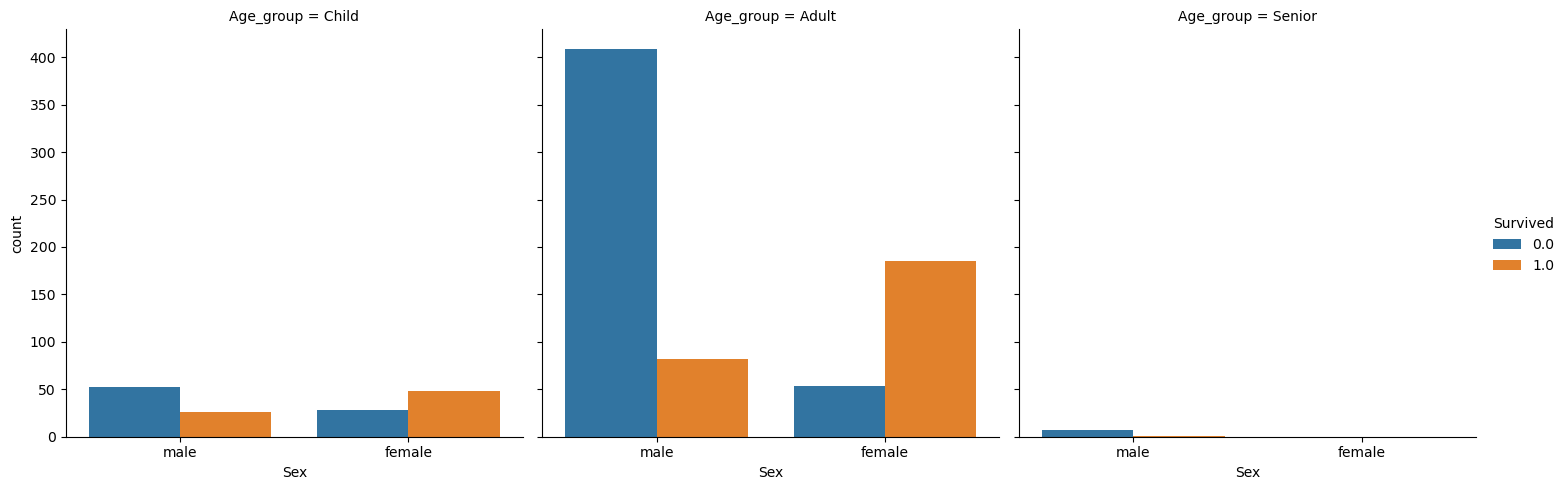

In [91]:
#analyze survival based on Sex and Age_group
print("Survival by Sex and Age_group:\n", data_imp.groupby(['Sex', 'Age_group'])['Survived'].value_counts())

sns.catplot(x='Sex', hue='Survived', col='Age_group', kind='count', data=data_imp)

plt.show()

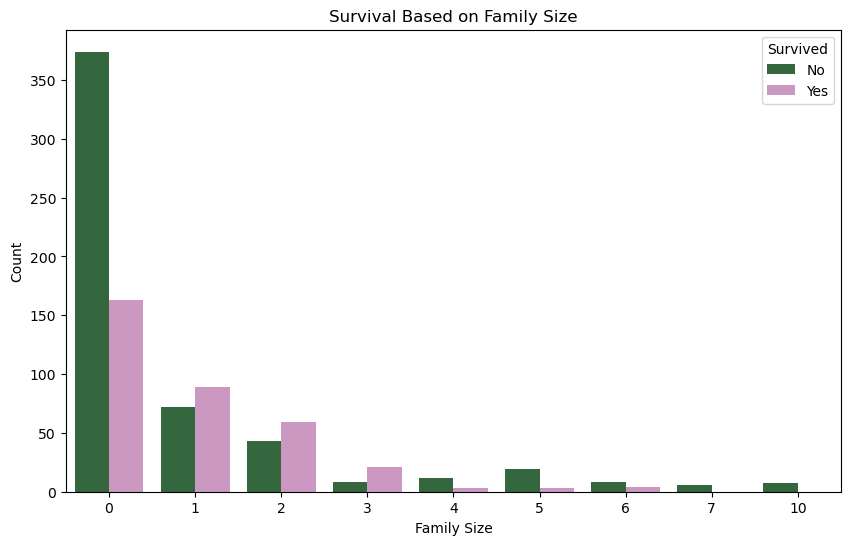

In [92]:
#survival based on family size (combining sibsp and parch).

data['Family_size'] = data['SibSp'] + data['Parch']

plt.figure(figsize=(10, 6))

sns.countplot(x='Family_size', hue='Survived', data=data, palette='cubehelix')

plt.title('Survival Based on Family Size')

plt.xlabel('Family Size')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

## 5. Feature Engineering

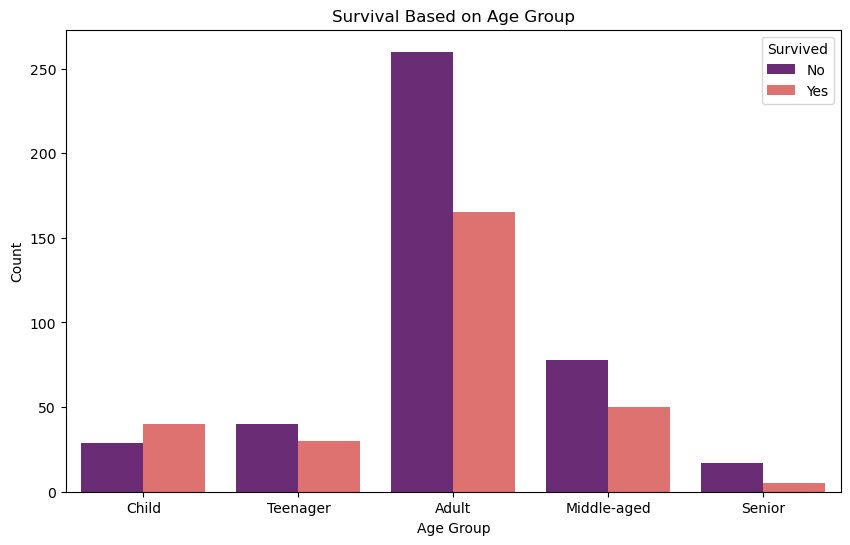

In [94]:
#create different age groups

bins = [0, 12, 18, 40, 60, 80]

labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

data['Age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)


#visualize survival by age group

plt.figure(figsize=(10, 6))

sns.countplot(x='Age_group', hue='Survived', data=data, palette='magma')

plt.title('Survival Based on Age Group')

plt.xlabel('Age Group')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

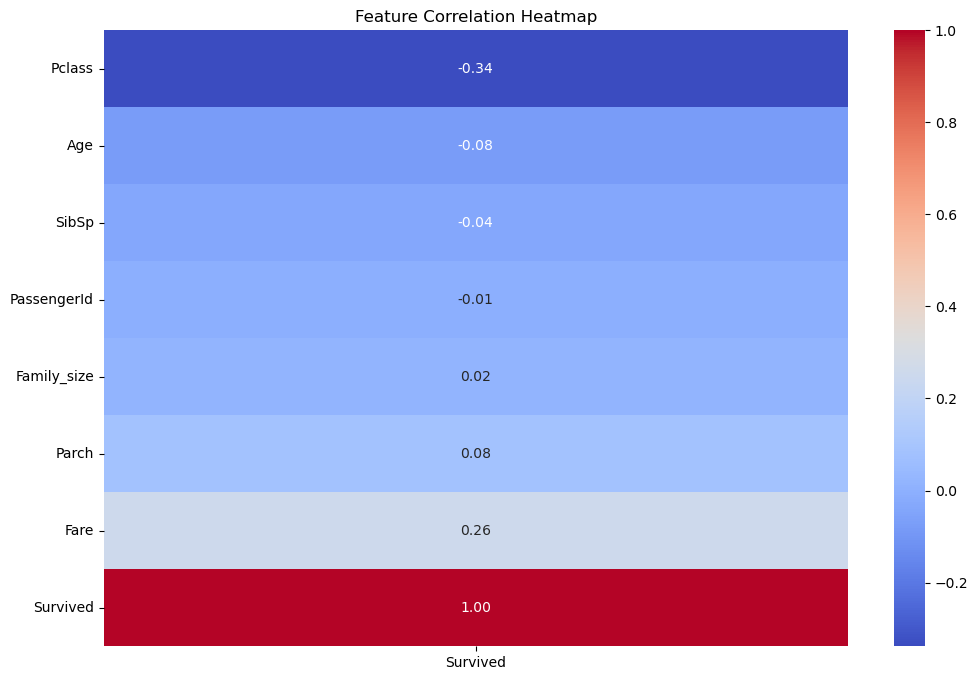

In [95]:
#correlation heatmap

plt.figure(figsize=(12, 8))

#select only numeric features for correlation calculation

num_features = data.select_dtypes(include=np.number)

sns.heatmap(num_features.corr()[['Survived']].sort_values(by='Survived'), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')

plt.show()

## **Conclusion and Analysis of Titanic Dataset EDA**

After conducting a detailed exploratory data analysis (EDA) on the Titanic dataset, here are the key findings and insights:

### **1. Demographic Insights**
- **Gender:**  
  - Females had a significantly higher survival rate compared to males. This aligns with the historical "women and children first" policy during the evacuation.

- **Age Groups:**  
  - Children (age ≤12) had the highest survival rate among all age groups.  
  - Adults (18–40 years) had a moderate survival rate, whereas older passengers (60+ years) had lower chances of survival.


### **2. Socioeconomic Insights**

- **Passenger Class (Pclass):**  
  - Passengers in **1st class** had much better survival chances compared to those in **2nd** or **3rd class**.  
  - The survival disparity likely resulted from better access to lifeboats and proximity to rescue points on the ship.

- **Fare:**  
  - Higher ticket fares were associated with increased survival rates. Wealthier passengers were more likely to be in 1st class, which offered better safety measures.


### **3. Family and Social Connections**

- **Family Size:**  
  - Passengers with small family sizes (1–3 members) had higher survival rates.  
  - Large families (5+ members) had a lower likelihood of survival, possibly due to challenges in coordinating and accessing lifeboats.

- **SibSp and Parch:**  
  - Passengers traveling alone had lower survival rates compared to those with companions.


### **4. Embarkation Point**
- Passengers who embarked at **Cherbourg (C)** had the highest survival rate.  
- Those who boarded at **Southampton (S)** had moderate survival chances, while **Queenstown (Q)** passengers had the lowest survival rates.


### **5. Correlation Analysis**
- Strong positive correlation observed between **fare** and **survived**, indicating that economic status played a significant role in survival.
- A slight correlation between **pclass** and **fare**, emphasizing the advantages of being in the upper classes.


### **Final Observations**
- **Survival Trends:** Survival was heavily influenced by gender, age, socioeconomic status, and embarkation point.  

- **Disparities:** Gender and class disparities were the most striking survival determinants, with females and 1st-class passengers significantly more likely to survive.  

- **Data Completeness:** The dataset had some missing values (e.g., `age`), which were handled through imputation, ensuring a robust analysis.


### **Recommendations for Future Analysis**

1. **Predictive Modeling:** 
       Use machine learning algorithms (e.g., Logistic Regression, Random Forest) to predict survival using these insights.

2. **Feature Engineering:**  Combine or create more features.